## Código de diagrama de barras Ghat GPT3

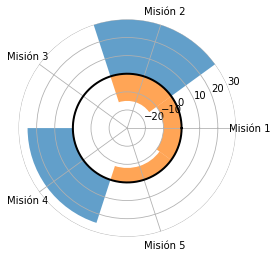

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de ejemplo
categorias = ['Misión 1', 'Misión 2', 'Misión 3', 'Misión 4', 'Misión 5']
valores_exterior = [0, 30, 0, 25, 0]
valores_interior = [-10, -15, 0, 0, -8]

# Configuración del gráfico
angulos = np.linspace(0, 2 * np.pi, len(categorias), endpoint=False)
ancho = 2 * np.pi / len(categorias) # Gráfico se divide en la cantidad de "barras" que hay

# Crear la figura y los subplots
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

# Configurar los límites del eje radial
ax.set_ylim(-30, max(valores_exterior))

# Crear las barras exteriores
ax.bar(angulos, valores_exterior, width=ancho, alpha=0.7)

# Crear las barras interiores
ax.bar(angulos, valores_interior, width=ancho, alpha=0.7)

# Configurar las etiquetas de las categorías
ax.set_xticks(angulos)
ax.set_xticklabels(categorias)

# Añadir una grilla radial
ax.yaxis.grid(True)

# Calcular el tamaño del círculo a dibujar
#radio_circulo = max(valores_exterior)
radio_circulo = 0

# Dibujar el círculo concéntrico alrededor de los demás círculos
theta = np.linspace(0, 2 * np.pi, 100)
r = np.full_like(theta, radio_circulo)
#ax.fill(theta, r, color='black', alpha=0.2)
ax.plot(theta, r, color='black', linewidth=2)

# Eliminar el borde en línea negra
ax.spines['polar'].set_visible(False)

# Mostrar el gráfico
plt.show()

## Ejercicio paso a paso

https://www.python-graph-gallery.com/circular-barplot-basic

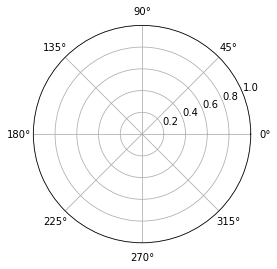

In [4]:
# Import matplotlib
import matplotlib.pyplot as plt
# import numpy to get the value of Pi
import numpy as np

import pandas as pd

# Initialize plot with polar coordinates.
plt.subplot(111, polar=True);

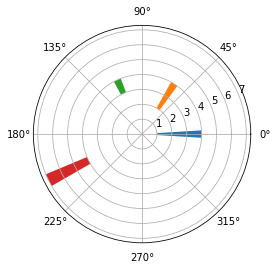

In [5]:


# Add a bar in the polar coordinates
plt.subplot(111, polar=True);
#plt.bar(x=0, height=-3, width=np.pi/2, bottom=4);
plt.bar(x=0, height=-3, width=np.pi/180*7.2, bottom=4); # np.pi/180*7.2 corresponde a 0.125664 radianes, q a su vez son 7.2 grados (360 / 50..... 50 son 5 misiiones con 10 proyectos c/u)
plt.bar(x=1, height=-2, width=np.pi/180*7.2, bottom=4);
plt.bar(x=2, height=-1, width=np.pi/180*7.2, bottom=4);
plt.bar(x=3.6, height=3, width=np.pi/180*7.2, bottom=4);

### 1. Trabajando con datos

In [6]:
# Working with data

# Build a dataset
df = pd.DataFrame(
        {
            'Name': ['item ' + str(i) for i in list(range(1, 51)) ],
            'Value': np.random.randint(low=10, high=100, size=50)
        })

# Show 3 first rows
#df.head()
df

,Name,Value
0,item 1,16
1,item 2,86
2,item 3,76
3,item 4,71
4,item 5,56
5,item 6,82
6,item 7,30
7,item 8,34
8,item 9,68
9,item 10,74


### 2. Creando diagrama circular

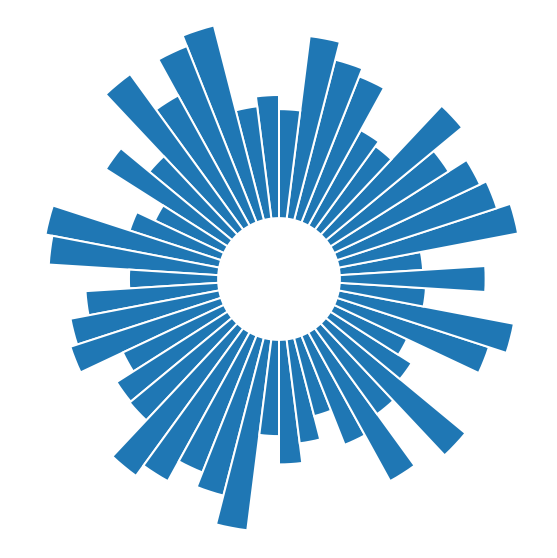

In [7]:
# set figure size
plt.figure(figsize=(20,10))

# plot polar axis
ax = plt.subplot(111, polar=True)

# remove grid
plt.axis('off')

# Set the coordinates limits
upperLimit = 100
lowerLimit = 30

# Compute max and min in the dataset
max = df['Value'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df.Value + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white")

### 3. Añadiendo etiquetas

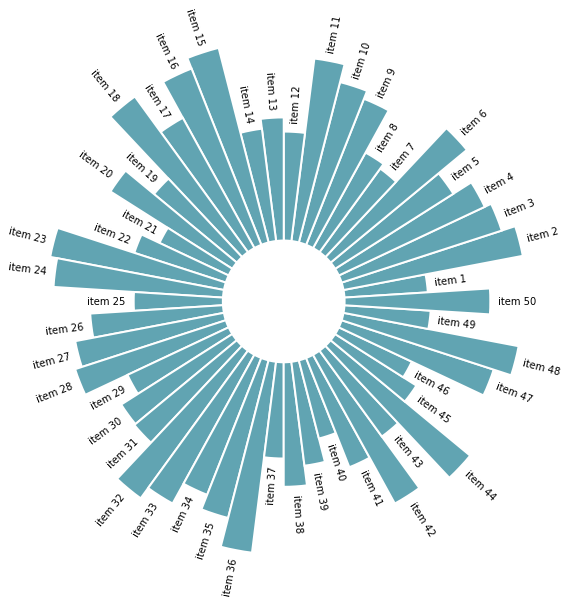

In [8]:
# initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#61a4b2",
)

# little space between the bar and the label
labelPadding = 4

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df["Name"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

### 4. Reorganizando valores

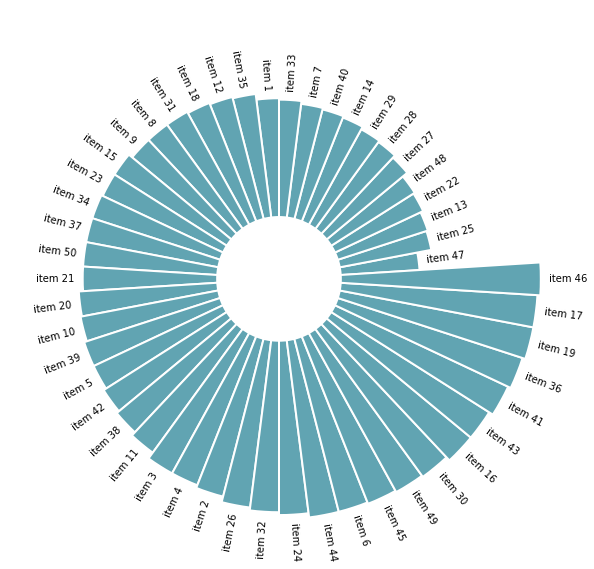

In [9]:
# import pandas for data wrangling
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Build a dataset
df = pd.DataFrame(
        {
            'Name': ['item ' + str(i) for i in list(range(1, 51)) ],
            'Value': np.random.randint(low=10, high=100, size=50)
        })

# Reorder the dataframe
df = df.sort_values(by=['Value'])

# initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 100
lowerLimit = 30
labelPadding = 4

# Compute max and min in the dataset
max = df['Value'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df.Value + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#61a4b2",
)

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df["Name"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor")

<br>
<br>

# Agrupando valores

https://www.python-graph-gallery.com/circular-barplot-with-groups

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [11]:
# Ensures reproducibility of random numbers
rng = np.random.default_rng(123)
# Build a dataset
df = pd.DataFrame({
    "name": [f"item {i}" for i in range(1, 51)],
    "value": rng.integers(low=30, high=100, size=50),
    "group": ["A"] * 10 + ["B"] * 20 + ["C"] * 12 + ["D"] * 8
})

# Show 3 first rows
df.head(3)

,name,value,group
0,item 1,31,A
1,item 2,77,A
2,item 3,71,A


In [12]:
# The following is a helper function that given the angle at which the bar is positioned and the offset used in the barchart, determines the rotation and alignment of the labels

def get_label_rotation(angle, offset):
    # Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    return rotation, alignment

In [13]:
# And this is the function that actually adds the labels (with ax.text()) to the plot:

def add_labels(angles, values, labels, offset, ax):
    
    # This is the space between the end of the bar and the label
    padding = 4
    
    # Iterate over angles, values, and labels, to add all of them.
    for angle, value, label, in zip(angles, values, labels):
        angle = angle
        
        # Obtain text rotation and alignment
        rotation, alignment = get_label_rotation(angle, offset)

        # And finally add the text
        ax.text(
            x=angle, 
            y=value + padding, 
            s=label, 
            ha=alignment, 
            va="center", 
            rotation=rotation, 
            rotation_mode="anchor"
        ) 

### Basic circular barplot with labels

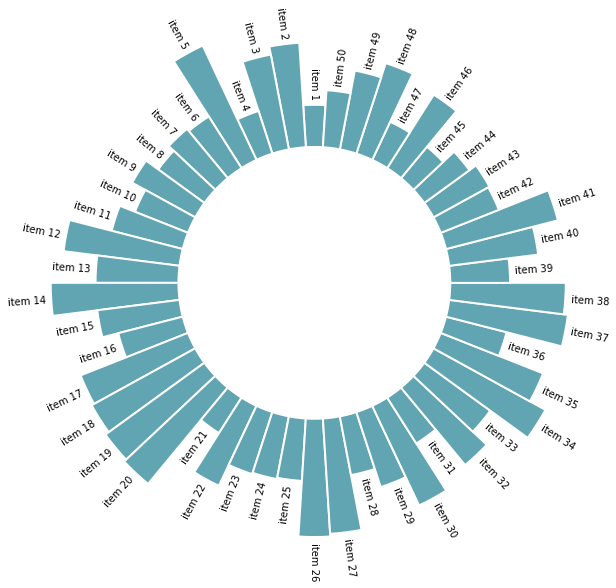

In [14]:
# Before creating a circular barplot with groups, let's review how to create a circular barplot with labels at the end of each bar. First of all, let's create ANGLES, which give the positions where bars are located. The VALUES array contains the heights of the bars, and LABELS stores the labels.

ANGLES = np.linspace(0, 2 * np.pi, len(df), endpoint=False)
VALUES = df["value"].values
LABELS = df["name"].values

# Determine the width of each bar. 
# The circumference is '2 * pi', so we divide that total width over the number of bars.
WIDTH = 2 * np.pi / len(VALUES)

# Determines where to place the first bar. 
# By default, matplotlib starts at 0 (the first bar is horizontal)
# but here we say we want to start at pi/2 (90 deg)
OFFSET = np.pi / 2

# Initialize Figure and Axis
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

# Specify offset
ax.set_theta_offset(OFFSET)

# Set limits for radial (y) axis. The negative lower bound creates the whole in the middle.
ax.set_ylim(-100, 100)

# Set the background color to white for both figure and axes
ax.patch.set_facecolor('white')
fig.patch.set_facecolor('white')

# Remove all spines
ax.set_frame_on(False)

# Remove grid and tick marks
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Add bars
ax.bar(
    ANGLES, VALUES, width=WIDTH, linewidth=2,
    color="#61a4b2", edgecolor="white"
)

# Add labels
add_labels(ANGLES, VALUES, LABELS, OFFSET, ax)

### Add a gap in the circle

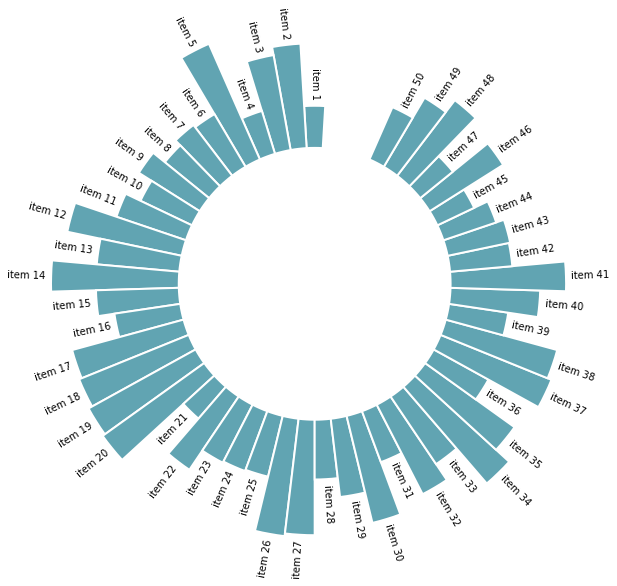

In [15]:
#The next step is to build a circular barplot with a break in the circle. Actually, the approach is just to increase the number of values in ANGLES, but leaving some of them unused so it creates the gap.

# 3 empty bars are added 
PAD = 3
ANGLES_N = len(VALUES) + PAD
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

# The index contains non-empty bards
IDXS = slice(0, ANGLES_N - PAD)

# The layout customization is the same as above
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 100)

# Set the background color to white for both figure and axes
ax.patch.set_facecolor('white')
fig.patch.set_facecolor('white')

ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Add bars, subsetting angles to use only those that correspond to non-empty bars
ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color="#61a4b2", 
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

### Space between groups

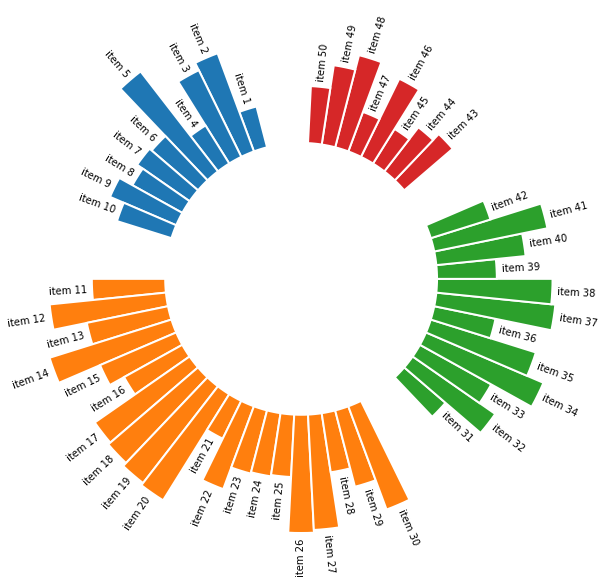

In [16]:
#This concept can now be used to add space between each group of the dataset. In this case, PAD empty bars are added at the end of each group.

#This chart is far more insightful since it allows one to quickly compare the different groups, and to compare the value of items within each group.

# Grab the group values
GROUP = df["group"].values

# Add three empty bars to the end of each group
PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

# Obtaining the right indexes is now a little more complicated
offset = 0
IDXS = []
GROUPS_SIZE = [10, 20, 12, 8]
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

# Same layout as above
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 100)

# Set the background color to white for both figure and axes
ax.patch.set_facecolor('white')
fig.patch.set_facecolor('white')

ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Use different colors for each group!
GROUPS_SIZE = [10, 20, 12, 8]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

# And finally add the bars. 
# Note again the `ANGLES[IDXS]` to drop some angles that leave the space between bars.
ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

### Order bars

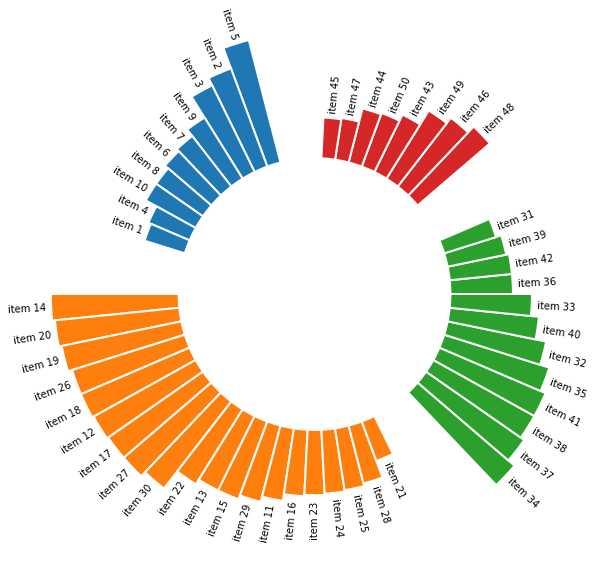

In [17]:
#Here observations are sorted by bar height within each group. It can be useful if your goal is to understand what are the highest / lowest observations within and across groups.

#The method does not modify the code to produce the plot, it only sort values using pandas methods. Basically, you just have to add the following piece of code right after the data frame creation:

# Reorder the dataframe
df_sorted = (
    df
    .groupby(["group"])
    .apply(lambda x: x.sort_values(["value"], ascending = False))
    .reset_index(drop=True)
)
VALUES = df_sorted["value"].values 
LABELS = df_sorted["name"].values
GROUP = df_sorted["group"].values

PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))

ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

offset = 0
IDXS = []
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 100)

# Set the background color to white for both figure and axes
ax.patch.set_facecolor('white')
fig.patch.set_facecolor('white')

ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

GROUPS_SIZE = [10, 20, 12, 8]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

# Add bars to represent ...
ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

### Circular barchart customization

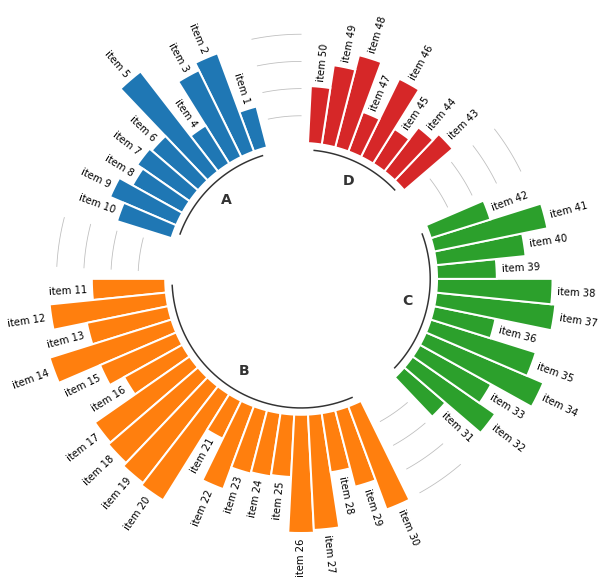

In [18]:
#Last but not least, it is highly advisable to add some customisation to your chart. Here we add group names (A, B, C and D), and we add a scale to help compare the sizes of the bars. Voila! The code is a bit long, but the result is quite worth it!

# All this part is like the code above
VALUES = df["value"].values
LABELS = df["name"].values
GROUP = df["group"].values

PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

offset = 0
IDXS = []
GROUPS_SIZE = [10, 20, 12, 8]
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})
ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 100)

# Set the background color to white for both figure and axes
ax.patch.set_facecolor('white')
fig.patch.set_facecolor('white')

ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

GROUPS_SIZE = [10, 20, 12, 8]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

# Extra customization below here --------------------

# This iterates over the sizes of the groups adding reference
# lines and annotations.

offset = 0 
for group, size in zip(["A", "B", "C", "D"], GROUPS_SIZE):
    # Add line below bars
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=50)
    ax.plot(x1, [-5] * 50, color="#333333")
    
    # Add text to indicate group
    ax.text(
        np.mean(x1), -20, group, color="#333333", fontsize=14, 
        fontweight="bold", ha="center", va="center"
    )
    
    # Add reference lines at 20, 40, 60, and 80
    x2 = np.linspace(ANGLES[offset], ANGLES[offset + PAD - 1], num=50)
    ax.plot(x2, [20] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [40] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [60] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [80] * 50, color="#bebebe", lw=0.8)
    
    offset += size + PAD